# Sign language identification

Sign language is a system of contractual signs made with the use of gestures and facial expressions, used to communicate without the use of hearing. Sign language is used mainly by people with hearing impairment, which makes it difficult or even completely impossible to receive speech only by hearing.
<img src="https://wakefield.apsva.us/wp-content/uploads/sites/37/2016/05/asl-image.jpg">
<sub><sup>source:\
https://wakefield.apsva.us/world-languages/american-sign-language/</sup></sub>

### Dataset

We received am American Sign Language hand gesture database with 24 letter classes (except J and Z which require movement).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter.

The training data with 27,455 cases and test data with 7172 cases represent a 28x28 pixel image with grayscale values between 0-255.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data_train = pd.read_csv("sign_mnist_train.csv")
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [20]:
labels = list("ABCDEFGHIKLMNOPQRSTUVWXY")

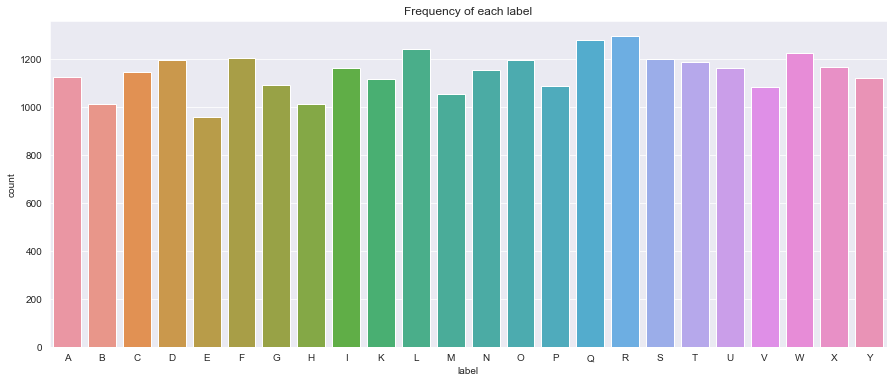

In [23]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (15,6))
sns.set_style("darkgrid")
sns.countplot(data_train["label"])
plt.title("Frequency of each label");
plt.xticks(range(24), labels);

The graph shows us that the amounts of our data are almost equal, there are no outliers. We can consider this data set to be balanced.

In [12]:
train_target = data_train['label']
train_target.head()
train_set = data_train.drop(['label'],axis=1)
train_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [13]:
X_train = train_set.values
X_train = train_set.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [14]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(train_target)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

**Preview of the images in the training dataset**

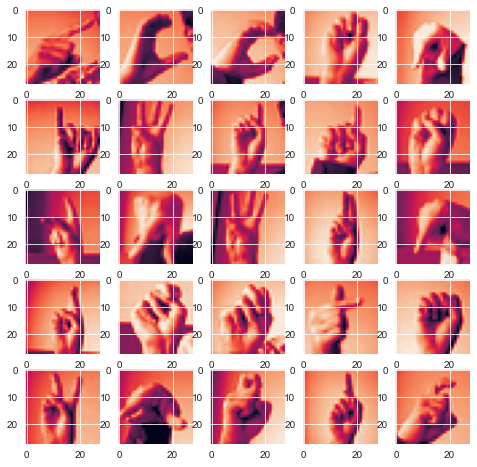

In [15]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
plt.show()

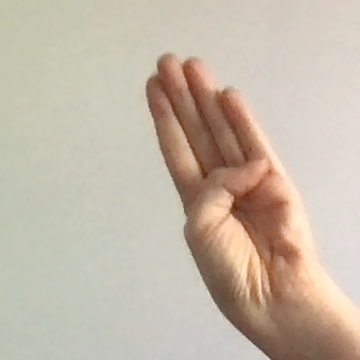

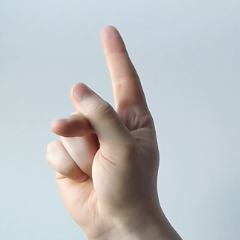

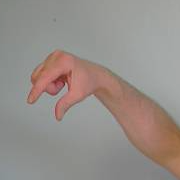

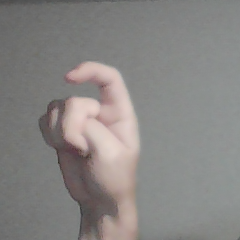

#### Architecture of convolutional neural network

    model = keras.models.Sequential([

        keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                            input_shape = [28, 28, 1]),
        keras.layers.MaxPool2D(2),

        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.MaxPool2D(2),

        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.MaxPool2D(2),

        keras.layers.Conv2D(512, 2, activation="relu", padding="same"),
        keras.layers.Conv2D(512, 2, activation="relu", padding="same"),
        keras.layers.MaxPool2D(2),

        keras.layers.Flatten(),

        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(24, activation="softmax")
        
        ])

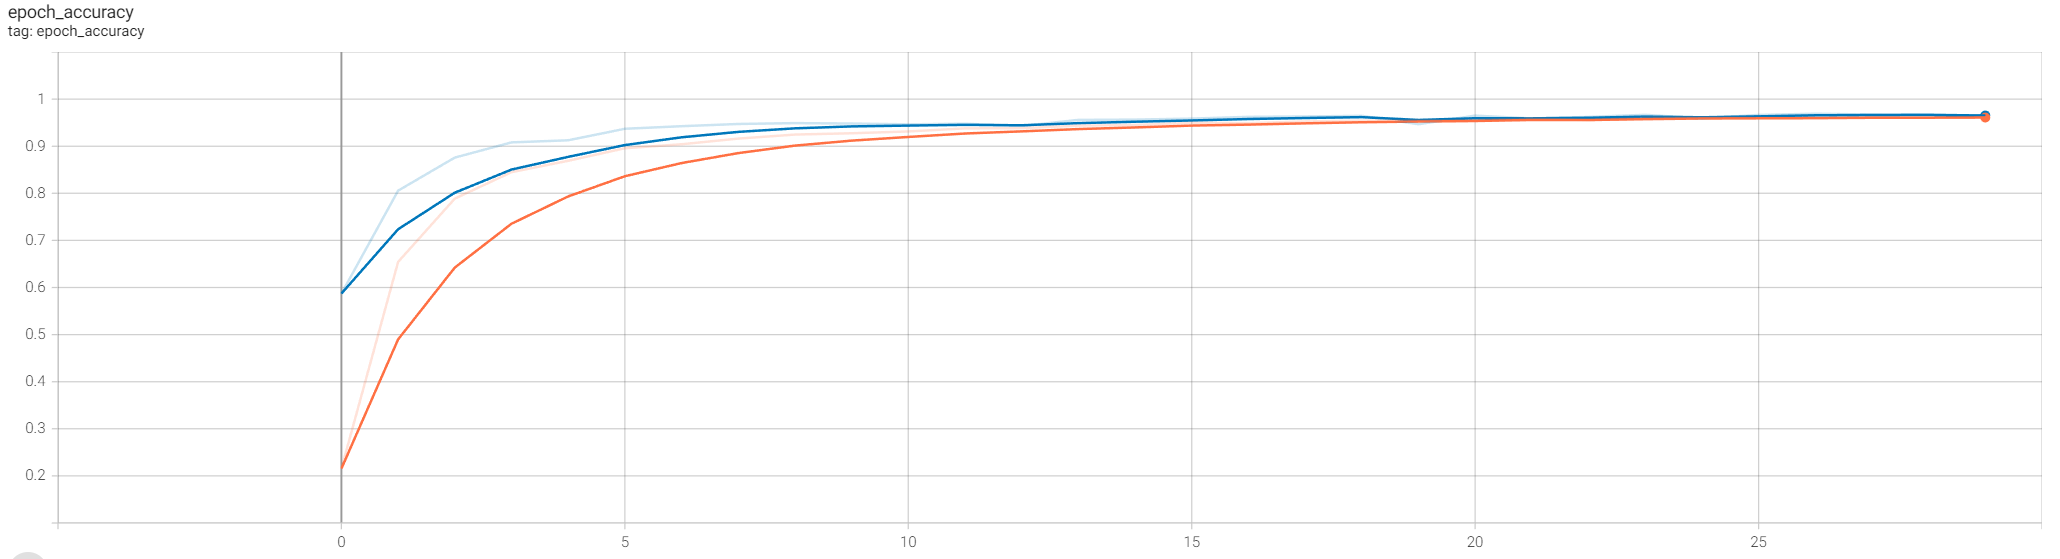

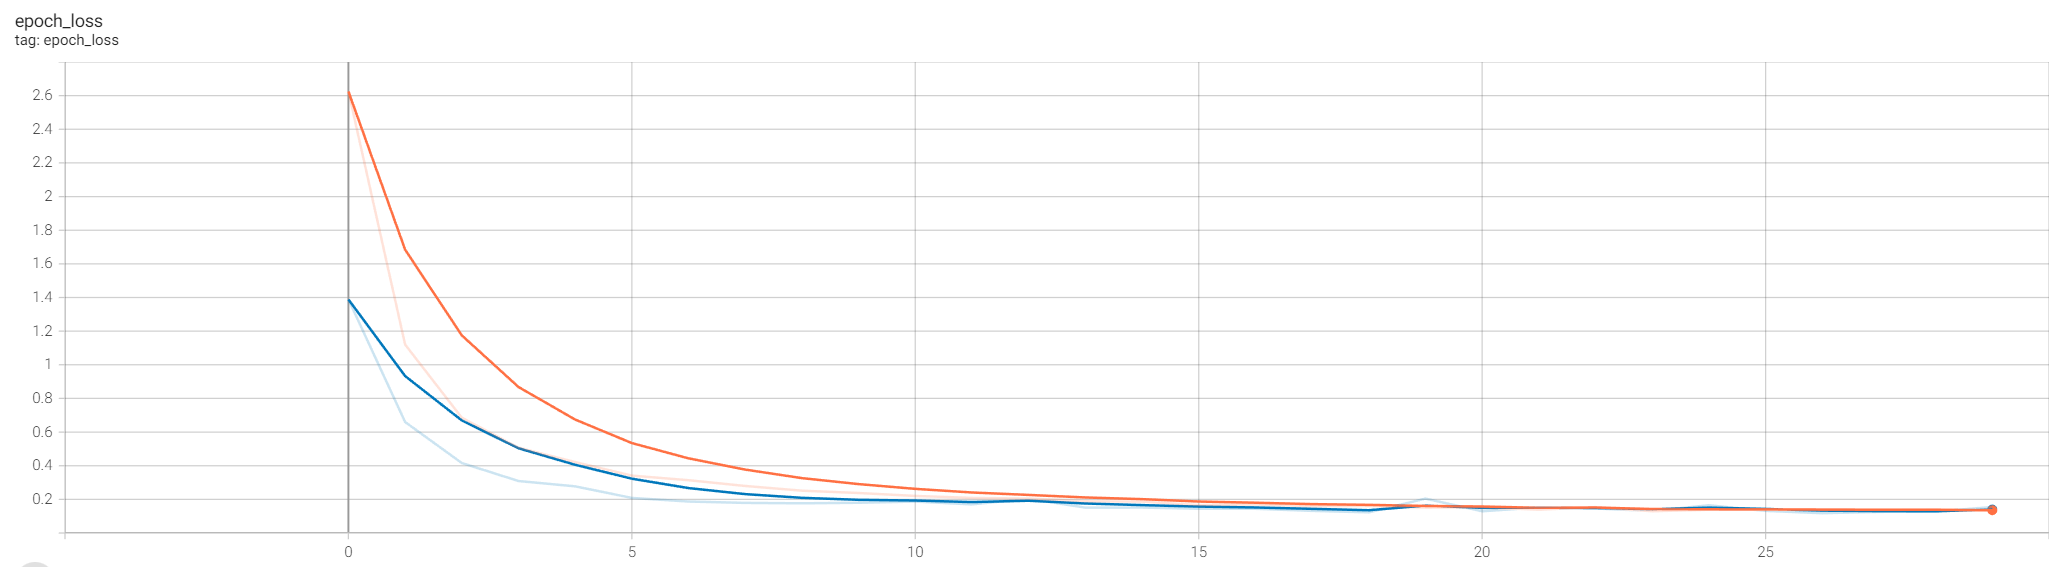

### Sign language facts
1. An estimate for the European Union is 750,000 Deaf sign language users
2. Deaf sign language users make up about 0.1% of the whole population in any given country
3. There are language families within sign languages. For example British Sign Language is very different to any other European sign language

<sub><sup>For mor information:
https://www.nidcd.nih.gov/health/statistics/quick-statistics-hearing</sup></sub>

### Statistics in US
Only 18% of deaf students earn their undergraduate degree compared to 33% of normal hearing individuals.\

<img src="https://audiologyblog.phonakpro.com/wp-content/uploads/2019/12/Deaf-people-and-education-attainment-in-the-US.png">
<sub><sup>source:\
https://audiologyblog.phonakpro.com/helping-teens-with-hearing-loss-succeed/</sup></sub>

Additionally, only 48% of individuals who are DHH were employed, compared to 72% of hearing people.
<img src="https://audiologyblog.phonakpro.com/wp-content/uploads/2019/12/Deaf-people-and-employment.png">

<sub><sup>source:\
https://audiologyblog.phonakpro.com/helping-teens-with-hearing-loss-succeed/</sup></sub>